In [1]:
import numpy as np

sigma = 5.67e-8
q = 1
epsilon = np.linspace(0.000001, 1.0, 100)
T = (q / (epsilon * sigma))**0.25
const = (q / sigma)**0.25
u = const * (1 / (4 * (epsilon**1.25)))

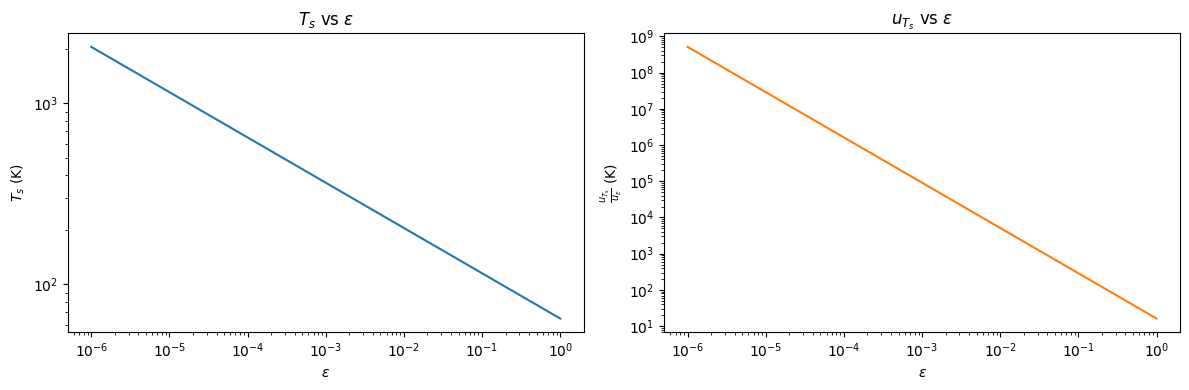

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Use log-log plots so both axes are on a logarithmic scale
axes[0].loglog(epsilon, T, color='tab:blue')
axes[0].set_xlabel(r'$\epsilon$')
axes[0].set_ylabel(r'$T_s$ (K)')
axes[0].set_title(r'$T_s$ vs $\epsilon$')

axes[1].loglog(epsilon, u, color='tab:orange')
axes[1].set_xlabel(r'$\epsilon$')
axes[1].set_ylabel(r'$\frac{u_{T_s}}{u_{\epsilon}}$ (K)')
axes[1].set_title(r'$u_{T_s}$ vs $\epsilon$')

plt.tight_layout()
plt.show()

In [17]:
L = 2 # Length (m)
F = 7.5 # Force (N)
Cp = 1000 # Heat capacity (J/kg*K)
m_H = 0.05 # Mass of hot fluid (kg)
m_L = 0.05 # Mass of cold fluid (kg)
Delta_T_H = 100 # Temperature difference of hot fluid (K)
Delta_T_L = 70 # Temperature difference of cold fluid (K)
Omega = 955 / 60 # Angular velocity (rev/s)

u_L = 0.02 * L
u_F = 0.02 * F
u_Cp = 0.02 * Cp
u_m_H = 0.02 * m_H
u_m_L = 0.02 * m_L
u_Delta_T_H = 0.02 * Delta_T_H
u_Delta_T_L = 0.02 * Delta_T_L
u_Omega = 0.02 * Omega

print(f"L: {L} ± {u_L:0.5} m")
print(f"F: {F} ± {u_F:0.5} N")
print(f"Cp: {Cp} ± {u_Cp:0.5} J/kg*K")
print(f"m_H: {m_H} ± {u_m_H:0.5} kg")
print(f"m_L: {m_L} ± {u_m_L:0.5} kg")
print(f"Delta_T_H: {Delta_T_H} ± {u_Delta_T_H:0.5} K")
print(f"Delta_T_L: {Delta_T_L} ± {u_Delta_T_L:0.5} K")
print(f"Omega: {Omega:0.5} ± {u_Omega:0.5} rev/s")

L: 2 ± 0.04 m
F: 7.5 ± 0.15 N
Cp: 1000 ± 20.0 J/kg*K
m_H: 0.05 ± 0.001 kg
m_L: 0.05 ± 0.001 kg
Delta_T_H: 100 ± 2.0 K
Delta_T_L: 70 ± 1.4 K
Omega: 15.917 ± 0.31833 rev/s


In [21]:
# Calculate COP uncertainty using equation 1
COP_1 = 1 / (m_H * Delta_T_H / (m_L * Delta_T_L) - 1)
theta_mh = (-(((m_H * Delta_T_H) / (m_L * Delta_T_L) - 1) ** -2) * (Delta_T_H / (m_L * Delta_T_L))) ** 2
theta_th = (-(((m_H * Delta_T_H) / (m_L * Delta_T_L) - 1) ** -2) * (m_H / (m_L * Delta_T_L))) ** 2
theta_ml = (-(((m_H * Delta_T_H) / (m_L * Delta_T_L) - 1) ** -2) * (-(m_H * Delta_T_H) / (m_L ** 2 * Delta_T_L))) ** 2
theta_tl = (-(((m_H * Delta_T_H) / (m_L * Delta_T_L) - 1) ** -2) * (-(m_H * Delta_T_H) / (m_L * Delta_T_L ** 2))) ** 2
u_COP_1 = np.sqrt(theta_mh * u_m_H**2 + theta_th * u_Delta_T_H**2 + theta_ml * u_m_L**2 + theta_tl * u_Delta_T_L**2)
print(f"u_COP = sqrt({u_m_H ** 2:0.5} * {theta_mh:0.5} + {u_Delta_T_H ** 2:0.5} * {theta_th:0.5} + {u_m_L ** 2:0.5} * {theta_ml:0.5} + {u_Delta_T_L ** 2:0.5} * {theta_tl:0.5}) = {u_COP_1:0.5}")
print(f"COP (eqn 1): {COP_1:0.5} ± {u_COP_1:0.5}")


u_COP = sqrt(1e-06 * 2.4198e+04 + 4.0 * 0.0060494 + 1e-06 * 2.4198e+04 + 1.96 * 0.012346) = 0.31111
COP (eqn 1): 2.3333 ± 0.31111


In [22]:
# Calculate COP uncertainty using equation 2
COP_2 = m_L * Cp * Delta_T_L / (F * L * 2 * np.pi * Omega)
theta_ml = (Cp * Delta_T_L / (F * L * 2 * np.pi * Omega)) ** 2
theta_cp = (m_L * Delta_T_L / (F * L * 2 * np.pi * Omega)) ** 2
theta_tl = (m_L * Cp / (F * L * 2 * np.pi * Omega)) ** 2
theta_f = (-(m_L * Cp * Delta_T_L / (F ** 2 * L * 2 * np.pi * Omega))) ** 2
theta_l = (-(m_L * Cp * Delta_T_L / (F * L ** 2 * 2 * np.pi * Omega))) ** 2
theta_o = (-(m_L * Cp * Delta_T_L / (F * L * 2 * np.pi * Omega ** 2))) ** 2
u_COP_2 = np.sqrt(theta_ml * u_m_L**2 + theta_cp * u_Cp**2 + theta_tl * u_Delta_T_L**2 + theta_f * u_F**2 + theta_l * u_L**2 + theta_o * u_Omega**2)
print(f"u_COP = sqrt({u_m_L ** 2:0.5} * {theta_ml:0.5} + {u_Cp ** 2:0.5} * {theta_cp:0.5} + {u_Delta_T_L ** 2:0.5} * {theta_tl:0.5} + {u_F ** 2:0.5} * {theta_f:0.5} + {u_L ** 2:0.5} * {theta_l:0.5} + {u_Omega ** 2:0.5} * {theta_o:0.5}) = {u_COP_2:0.5}")
print(f"COP (eqn 2): {COP_2:0.5} ± {u_COP_2:0.5}")

u_COP = sqrt(1e-06 * 2177.5 + 400.0 * 5.4436e-06 + 1.96 * 0.0011109 + 0.0225 * 0.096776 + 0.0016 * 1.3609 + 0.10134 * 0.021487) = 0.1143
COP (eqn 2): 2.3332 ± 0.1143
